# Quantium Retail Analysis

<div style="text-align: center;">
    <img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcGRkc3drM24yd3lueWcxZGNyYXMxcXMyNm5lNTZ0aHM5ZGFrenh0NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oKHWeyTXsluferlqU/giphy.webp" alt="Chips" style="width: 500px;" />
</div>

<span style="font-size: 20px;"> __Department's Need__ </span>
<div><span style="font-size: 18px;"> <b>Objective:</b> To analyze transaction data to uncover patterns and insights that can inform business decisions and improve customer satisfaction. The retail store has collected a large dataset of customer transactions, including details such as purchase amounts, quantities, prices, and purchase dates. The goal is to leverage this data to understand customer purchasing behavior, identify trends, and predict future sales.

## Libraries and Data

In [1]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

In [2]:
# Adjusting columns size and width

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Adjust display width

In [4]:
# To get files

In [5]:
# Google Drive file ID
transaction_file_id = '1NI9Oe5CtVxC8VTsSqf5DZbmpPVs3FIjy'
behaviour_file_id = '10uv1JmDeV7VyAPh_oNiRxeAEzT3YUL4f'

# Construct the direct download URL
tran_url = f'https://drive.google.com/uc?export=download&id={transaction_file_id}'
behav_url = f'https://drive.google.com/uc?export=download&id={behaviour_file_id}'

In [10]:
# QVI transaction file

In [6]:
# Read file
tran_file_path = tran_url
behav_file_path = behav_url

tran_df = pd.read_excel(tran_file_path)

In [7]:
tran_df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [11]:
# QVI customers behaviour

In [8]:
# Read the url into a DataFrame
behav_df = pd.read_csv(behav_url, engine='python')

In [9]:
behav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


## EDA and Cleaning

In [12]:
# QVI transactions

In [13]:
tran_df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [14]:
print ("The number of rows are:", tran_df.shape[0])
print ("The number of columns are:", tran_df.shape[1])

The number of rows are: 264836
The number of columns are: 8


In [15]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [16]:
tran_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [17]:
tran_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [18]:
tran_df[tran_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [19]:
tran_df = tran_df.drop_duplicates()
tran_df[tran_df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [20]:
print(f'Features: {tran_df.columns.tolist()}')
print(f'Missing Values: {tran_df.isnull().values.sum()}')
print(f'Unique Values: \n\n{tran_df.nunique()}')

Features: ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']
Missing Values: 0
Unique Values: 

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64


In [21]:
# QVI Customer Behaviour

In [22]:
behav_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [23]:
print ("The number of rows are:", behav_df.shape[0])
print ("The number of columns are:", behav_df.shape[1])

The number of rows are: 72637
The number of columns are: 3


In [24]:
behav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
behav_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [26]:
behav_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [27]:
behav_df[behav_df.duplicated()]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [28]:
print(f'Features: {behav_df.columns.tolist()}')
print(f'Missing Values: {behav_df.isnull().values.sum()}')
print(f'Unique Values: \n\n{behav_df.nunique()}')

Features: ['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']
Missing Values: 0
Unique Values: 

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64


In [30]:
behav_df["PREMIUM_CUSTOMER"].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

### Extract Packet Weight

In [33]:
# Extract packet weight

def extract_packet_weight(row):
    # Search for any sequence of digits in the 'PROD_NAME' column
    match = re.search(r'\d+', row['PROD_NAME'])
    if match:
        return match.group()
    else:
        return None  # Return None if no numeric value found

# Apply the function to create a new column 'packet_weight'
tran_df = tran_df.copy()
tran_df['PKT_WGT'] = tran_df.apply(extract_packet_weight, axis=1)

# Now 'packet_weight' contains the numeric portion from each row
tran_df[['PROD_NAME', 'PKT_WGT']].head()

,PROD_NAME,PKT_WGT
0,Natural Chip Compny SeaSalt175g,175
1,CCs Nacho Cheese 175g,175
2,Smiths Crinkle Cut Chips Chicken 170g,170
3,Smiths Chip Thinly S/Cream&Onion 175g,175
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150


### Extract Brand Name

In [35]:
# Extract brand name
def extract_brand_name(row):
    return row['PROD_NAME'].split()[0]  # Use str.split() correctly

# Apply the function to create a new column 'brand_name'
tran_df['BRAND_NAME'] = tran_df.apply(extract_brand_name, axis=1)

# Now 'BRAND_NAME' contains the first word from each 'PROD_NAME'
tran_df[['PROD_NAME', 'BRAND_NAME']].head()

,PROD_NAME,BRAND_NAME
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle


### Extract Day Name, Months and Years

In [76]:
tran_df['Day_Name'] = tran_df['DATE'].dt.day_name()
tran_df['Month_Name'] = tran_df['DATE'].dt.month_name()
tran_df['Year'] = tran_df['DATE'].dt.year
tran_df['MonthYear'] = tran_df['DATE'].dt.strftime('%m/%Y')
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,Size_Category,z_score,Day_Name,Month_Name,Year,MonthYear
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large,0.516766,Wednesday,October,2018,10/2018
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large,0.395727,Tuesday,May,2019,05/2019
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large,1.767504,Monday,May,2019,05/2019
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium,2.630253,Saturday,August,2018,08/2018
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,Extra Large,0.879884,Sunday,May,2019,05/2019


### Create size based on packet weight

In [42]:
# Ensure packet weight column is an integer
tran_df['PKT_WGT'] = tran_df['PKT_WGT'].astype(int)

In [40]:
# Define the size categories
bins = [0, 50, 150, 250, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Extra Large']
tran_df['Size_Category'] = pd.cut(tran_df['PKT_WGT'], bins=bins, labels=labels)

# Display the updated DataFrame
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,Size_Category
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Large
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,Large
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Large
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Large
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Medium


### Brand Name correction

In [45]:
brand_replacements = {"Infzns": "Infuzions",
                        "Snbts":"Sunbites",
                        "Smith":"Smiths",
                        "Dorito":"Doritos"
                      }

tran_df['BRAND_NAME'] = tran_df['BRAND_NAME'].replace(brand_replacements)

### Remove Packet Weight

In [46]:
# Remove packet weight from 'PROD_NAME'
tran_df['PROD_NAME'] = tran_df['PROD_NAME'].str[:-4].str.strip() 
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,Size_Category
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths,Large
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium


In [47]:
### Removing White spaces in Product name

In [49]:
# Cleaning white spaces
tran_df['PROD_NAME']= tran_df['PROD_NAME'].str.strip()
tran_df['PROD_NAME'] = tran_df['PROD_NAME'].str.replace(r'\s+', ' ')

### Eliminating outliers

In [60]:
# To identify outliers for PROD_QTY
from scipy import stats

# Calculate Z-scores
tran_df['z_score'] = np.abs(stats.zscore(tran_df['PROD_QTY']))

# Identify outliers
outliers = tran_df[(tran_df['z_score'] > 3) | (tran_df['z_score'] < -3)]

outliers["PROD_QTY"].value_counts()

PROD_QTY
5      450
4      397
200      2
Name: count, dtype: int64

In [61]:
len(outliers)

849

In [68]:
# Drop rows where PROD_QTY is higher than 5
tran_df = tran_df[tran_df['PROD_QTY'] < 5]

# Display the updated DataFrame
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,Size_Category,z_score
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large,0.423000
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large,0.325699
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large,1.428441
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium,2.106819
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,Extra Large,0.714902


In [130]:
tran_df.drop("Z_SCORE",axis=1,inplace=True)

In [125]:
tran_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,Z_SCORE,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large,0.516766,Wednesday,October,2018,10/2018
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large,0.395727,Tuesday,May,2019,05/2019
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large,1.767504,Monday,May,2019,05/2019
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium,2.630253,Saturday,August,2018,08/2018
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,Extra Large,0.879884,Sunday,May,2019,05/2019


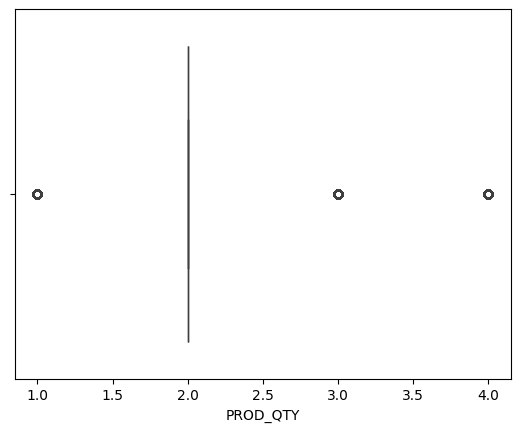

In [71]:
# Create a box plot
import seaborn as sns

sns.boxplot(x=tran_df['PROD_QTY'])

# Show the plot
plt.show()

In [123]:
# Convert all column names to uppercase
tran_df.columns = tran_df.columns.str.upper()

## Vizualizations

In [131]:
df = pd.merge(tran_df, behav_df, on='LYLTY_CARD_NBR', how='left')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,Large,Wednesday,October,2018,10/2018,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,Large,Tuesday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,Large,Monday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,Medium,Saturday,August,2018,08/2018,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old,Extra Large,Sunday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget


In [83]:
# Showing distributions of customers

In [141]:
def plot_unique_users(data, columns):
    """
    This function takes a DataFrame and a list of columns of interest,
    returns the unique users for each column, and plots the distribution of the specified columns.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns of interest.
    
    """
    unique_users_dict = {}
    
    for column in columns:
        # Get the unique users for the column
        unique_users = data[column].unique()
        unique_users_dict[column] = unique_users
        
        # Plot the distribution of the specified column
        cust_dist = data[column].value_counts()
        cust_dist.plot(kind='barh', color='skyblue')
        plt.xticks(rotation=360)
        plt.title(f"Distribution of {column}")
        plt.show()

In [142]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PKT_WGT', 'BRAND_NAME',
       'SIZE_CATEGORY', 'DAY_NAME', 'MONTH_NAME', 'YEAR', 'MONTHYEAR',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

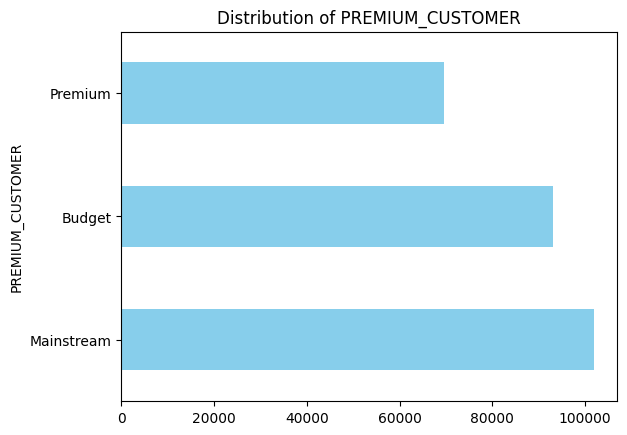

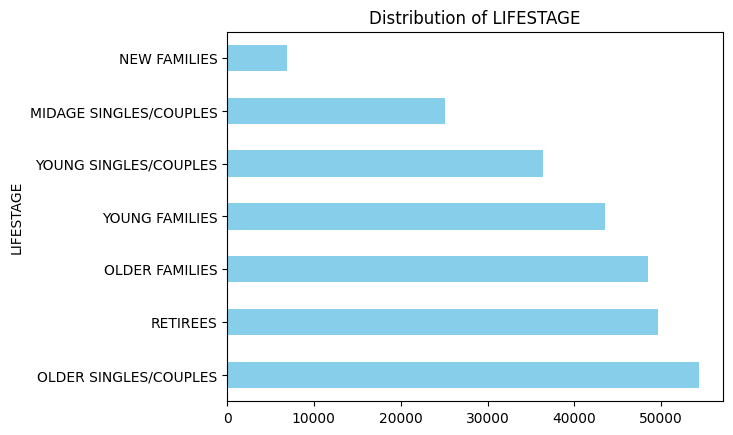

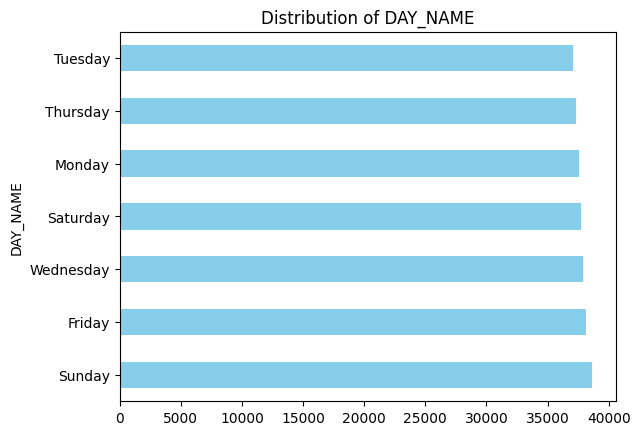

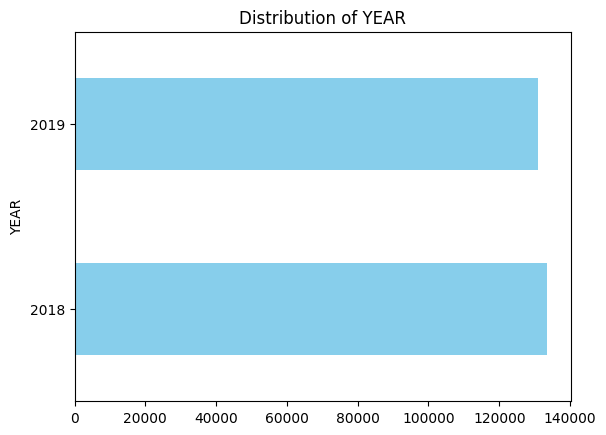

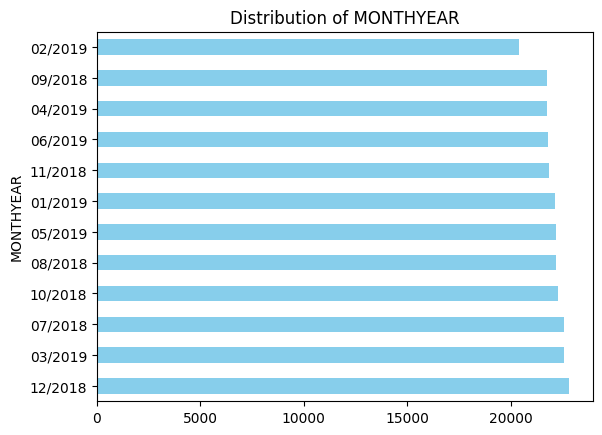

In [143]:
columns_of_interest = ['PREMIUM_CUSTOMER', 'LIFESTAGE', 'DAY_NAME', 'YEAR', 'MONTHYEAR']
plot_unique_users(df, columns_of_interest)

In [89]:
# Top 10 buyers and spenders

In [90]:
def plot_top_customers(data, customer_column, sales_column, top_n=10):
    """
    This function takes a DataFrame, groups by the customer column, sums the sales column,
    and plots the top N customers based on total sales.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    customer_column (str): The column name representing customers.
    sales_column (str): The column name representing sales.
    top_n (int): The number of top customers to plot. Default is 10.
    
    Returns:
    pd.Series: A series containing the top N customers and their total sales.
    """
    # Group by the customer column and sum the sales column
    sales_by_cust = data.groupby(customer_column)[sales_column].sum().sort_values(ascending=True)
    
    # Get the top N customers
    top_customers = sales_by_cust.tail(top_n)
    
    # Plot the top N customers
    top_customers.plot(kind='barh', color='skyblue')
    plt.xlabel("Sales")
    plt.title(f'Top {top_n} buyers')
    plt.show()
    
    return top_customers

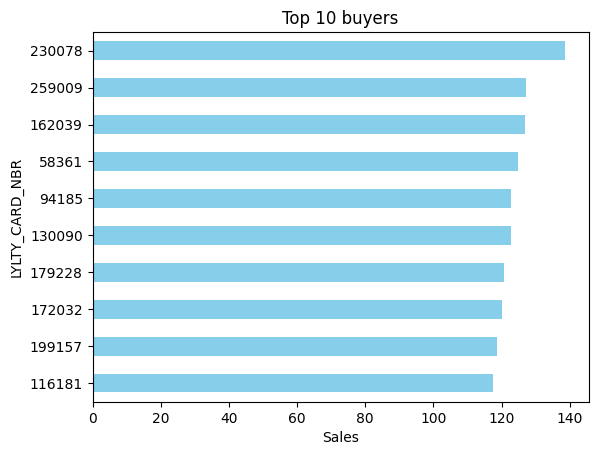

LYLTY_CARD_NBR
116181    117.60
199157    118.80
172032    120.10
179228    120.80
130090    122.65
94185     122.80
58361     124.80
162039    126.80
259009    127.20
230078    138.60
Name: TOT_SALES, dtype: float64

In [93]:
top_spenders = plot_top_customers(df, 'LYLTY_CARD_NBR', 'TOT_SALES')
top_spenders

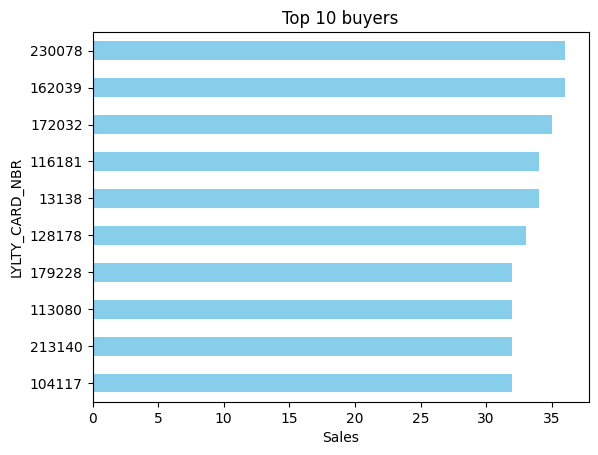

LYLTY_CARD_NBR
104117    32
213140    32
113080    32
179228    32
128178    33
13138     34
116181    34
172032    35
162039    36
230078    36
Name: PROD_QTY, dtype: int64

In [95]:
top_quantity_bought = plot_top_customers(df, 'LYLTY_CARD_NBR', 'PROD_QTY')
top_quantity_bought

In [144]:
# Distribution by sum of TOT_SALES

In [102]:
def plot_sales_by_each_column(data, columns, sales_column):
    """
    This function takes a DataFrame, a list of columns, and a sales column,
    and plots the total sales for each column individually.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns to group by individually.
    sales_column (str): The column name representing sales.
    
    Returns:
    dict: A dictionary containing the total sales for each column.
    """
    sales_by_columns = {}
    
    for column in columns:
        # Group by the column and sum the sales column
        sales_by_group = data.groupby(column)[sales_column].sum()
        
        # Sort the sales by group
        sorted_sales_group = sales_by_group.sort_values()
        
        # Plot the total sales for each group
        plt.figure(figsize=(10, 6))
        sorted_sales_group.plot(kind='barh', color='skyblue')
        plt.xlabel('Total Sales')
        plt.title(f'Total Sales by {column}')
        plt.show()
        
        # Store the result in the dictionary
        sales_by_columns[column] = sorted_sales_group

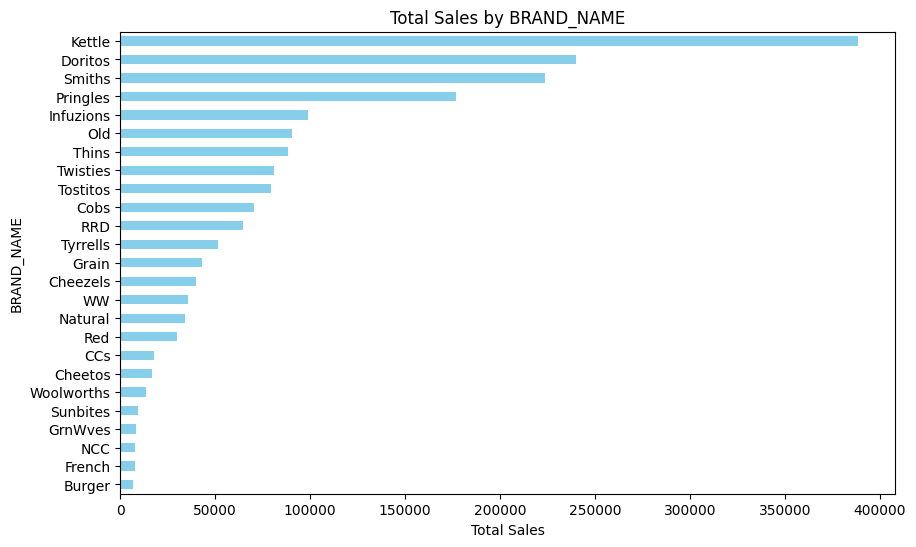

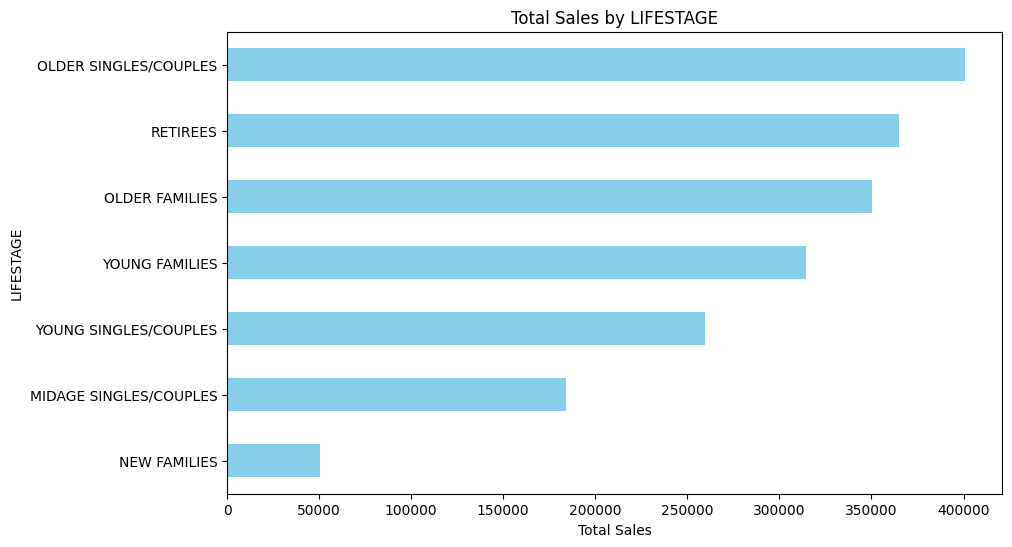

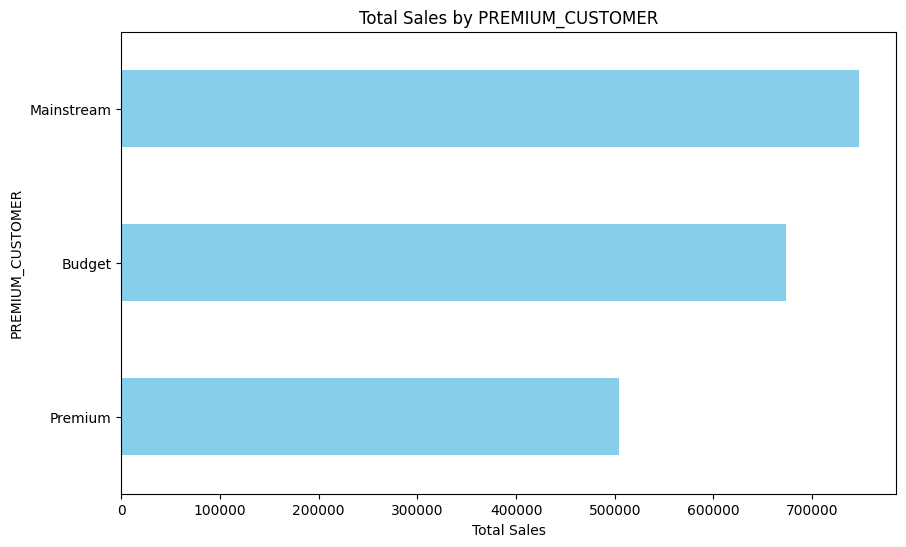

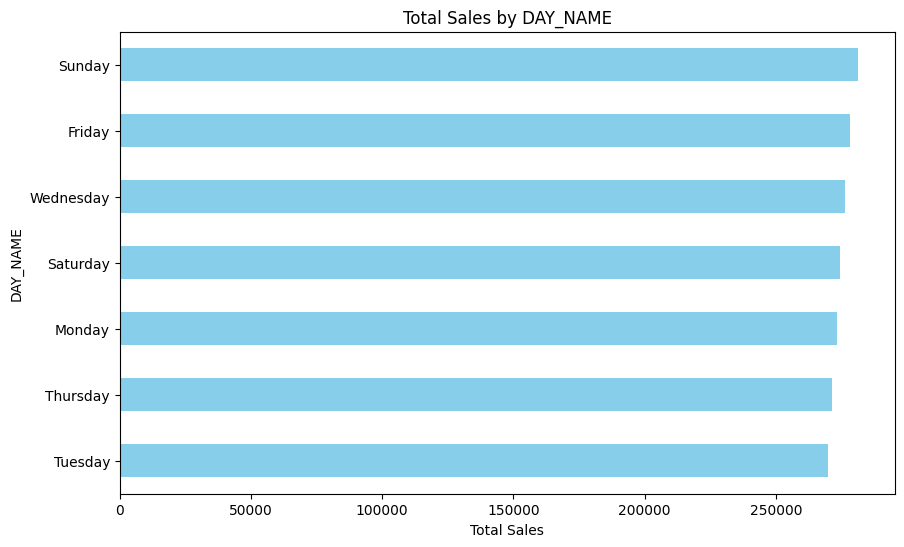

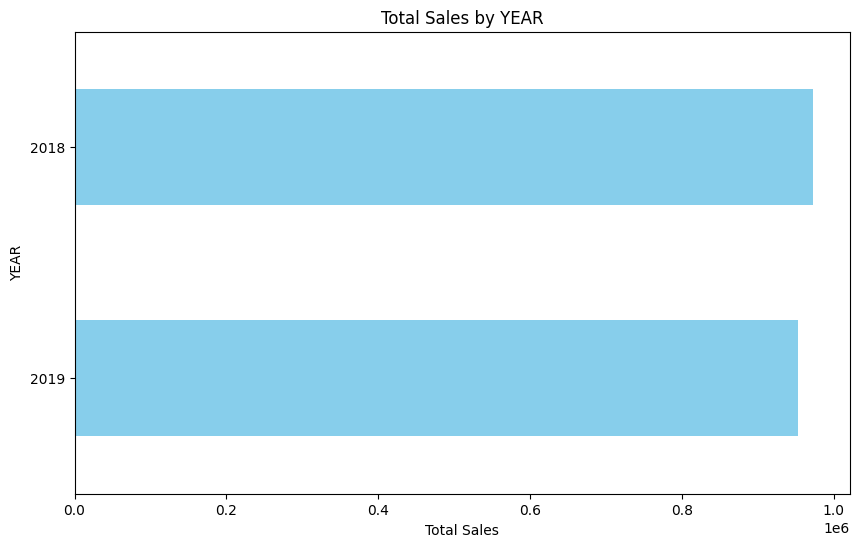

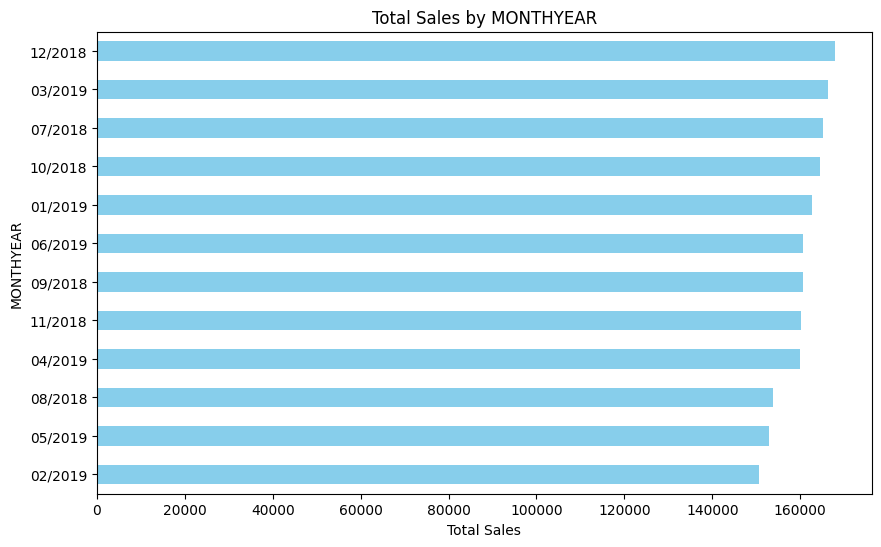

In [145]:
group_columns = ['BRAND_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DAY_NAME', 'YEAR', 'MONTHYEAR']
sales_column = 'TOT_SALES'

plot_sales_by_each_column(df, group_columns, sales_column)

In [146]:
# Distribution by average of TOT_SALES

In [147]:
def plot_avg_sales_by_each_column(data, columns, sales_column):
    """
    This function takes a DataFrame, a list of columns, and a sales column,
    and plots the total sales for each column individually.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns to group by individually.
    sales_column (str): The column name representing sales.
    
    Returns:
    dict: A dictionary containing the total sales for each column.
    """
    sales_by_columns = {}
    
    for column in columns:
        # Group by the column and sum the sales column
        sales_by_group = data.groupby(column)[sales_column].mean()
        
        # Sort the sales by group
        sorted_sales_group = sales_by_group.sort_values()
        
        # Plot the total sales for each group
        plt.figure(figsize=(10, 6))
        sorted_sales_group.plot(kind='barh', color='skyblue')
        plt.xlabel('Average Sales')
        plt.title(f'Avg Sales by {column}')
        plt.show()
        
        # Store the result in the dictionary
        sales_by_columns[column] = sorted_sales_group

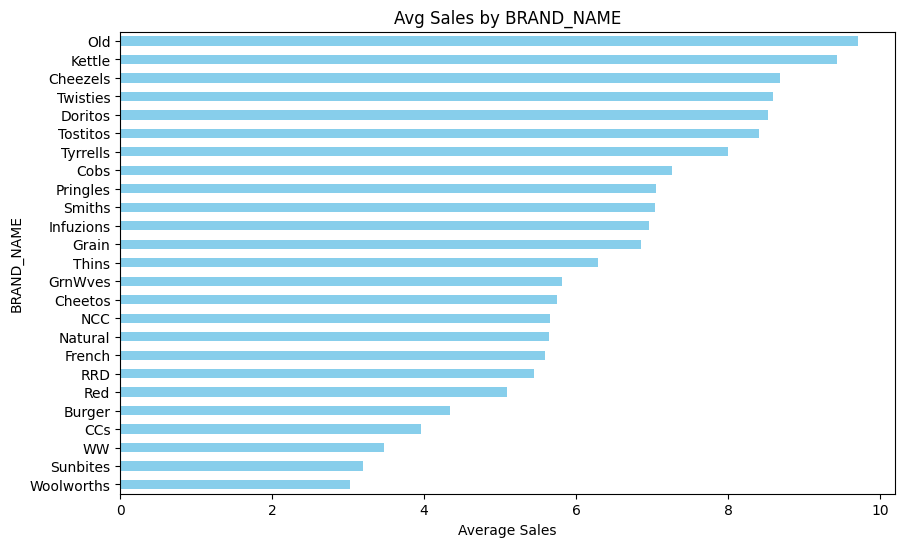

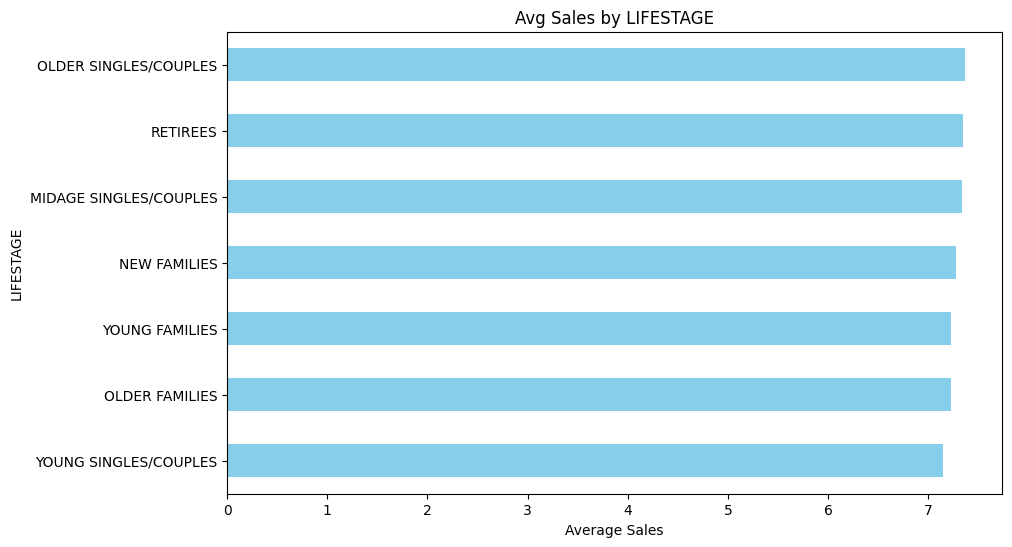

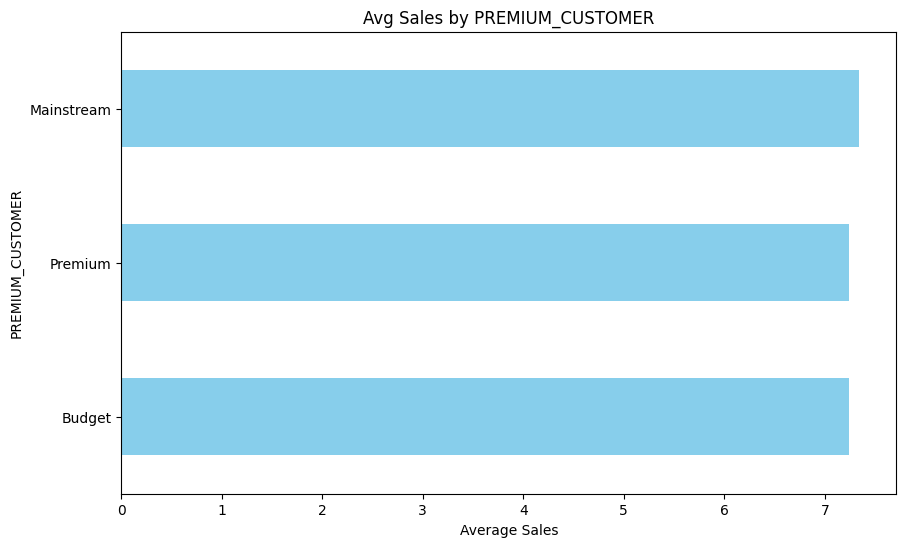

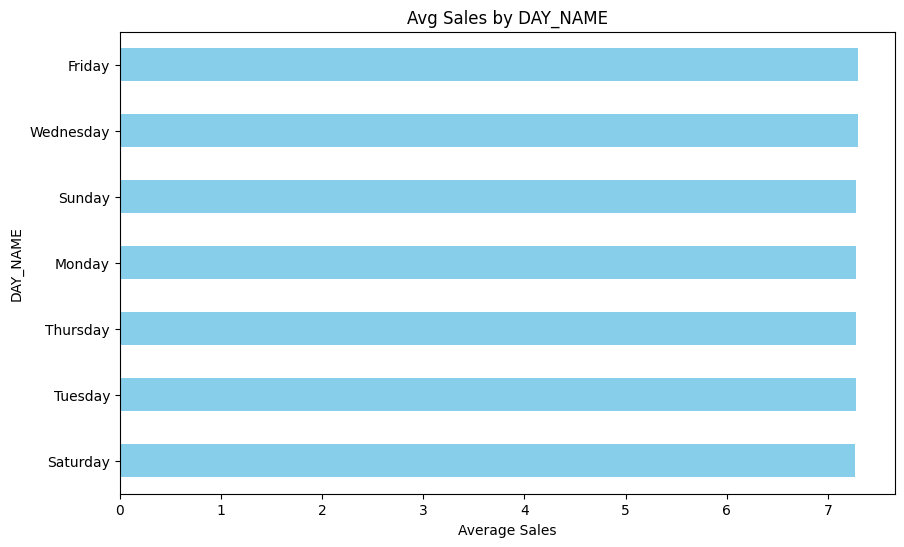

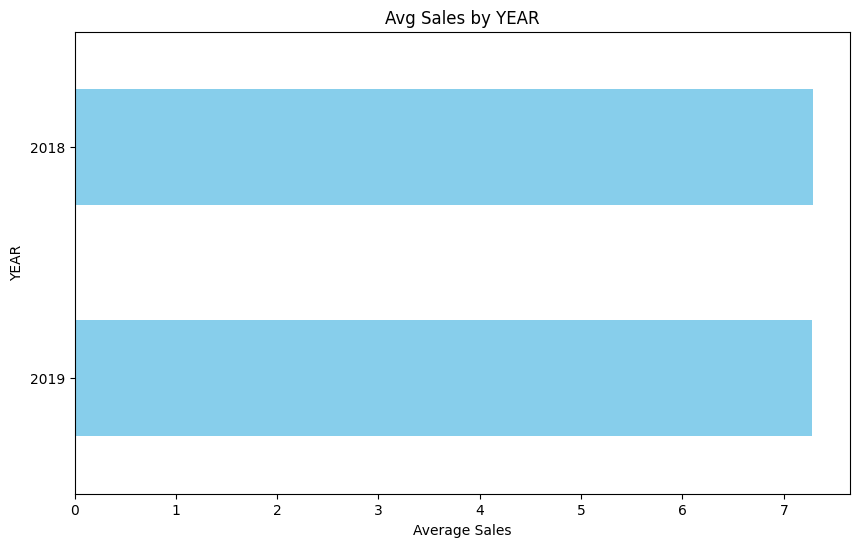

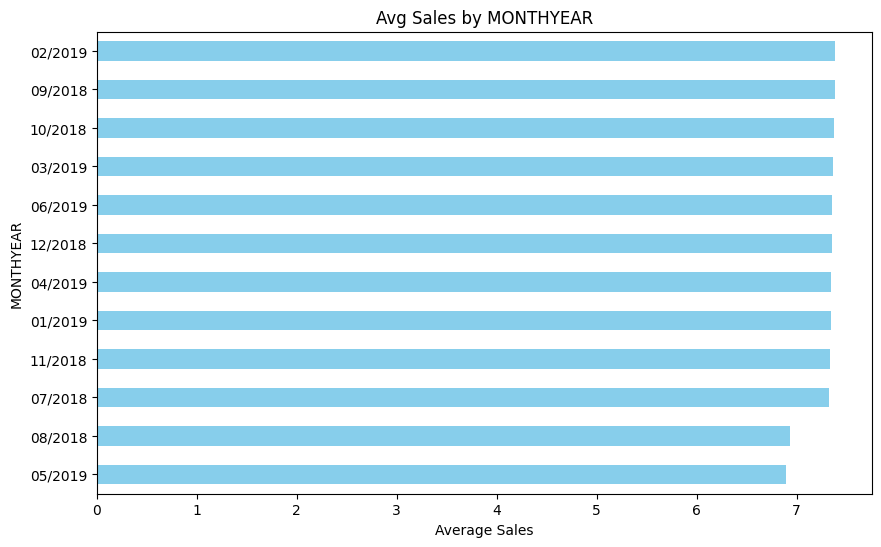

In [148]:
plot_avg_sales_by_each_column(df, group_columns, sales_column)

In [149]:
# Distribution of total PROD_QTY

In [150]:
def plot_qty_by_each_column(data, columns, qty_column):
    """
    This function takes a DataFrame, a list of columns, and a sales column,
    and plots the total sales for each column individually.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns to group by individually.
    sales_column (str): The column name representing sales.
     """
       
    for column in columns:
        # Group by the column and sum the sales column
        qty_by_group = data.groupby(column)[qty_column].sum()
        
        # Sort the sales by group
        sorted_qty_group = qty_by_group.sort_values()
        
        # Plot the total sales for each group
        plt.figure(figsize=(10, 6))
        sorted_qty_group.plot(kind='barh', color='skyblue')
        plt.xlabel('Total Quantity')
        plt.title(f'Total Quantity by {column}')
        plt.show()

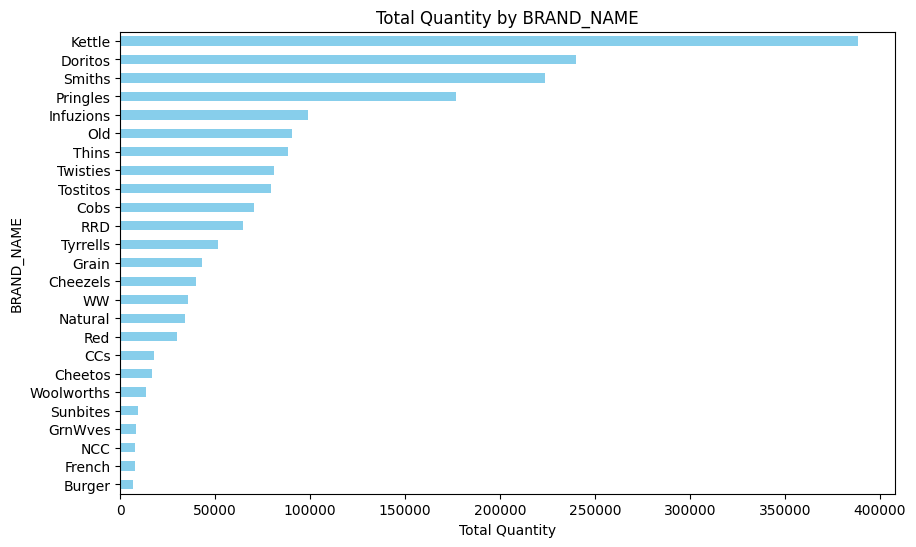

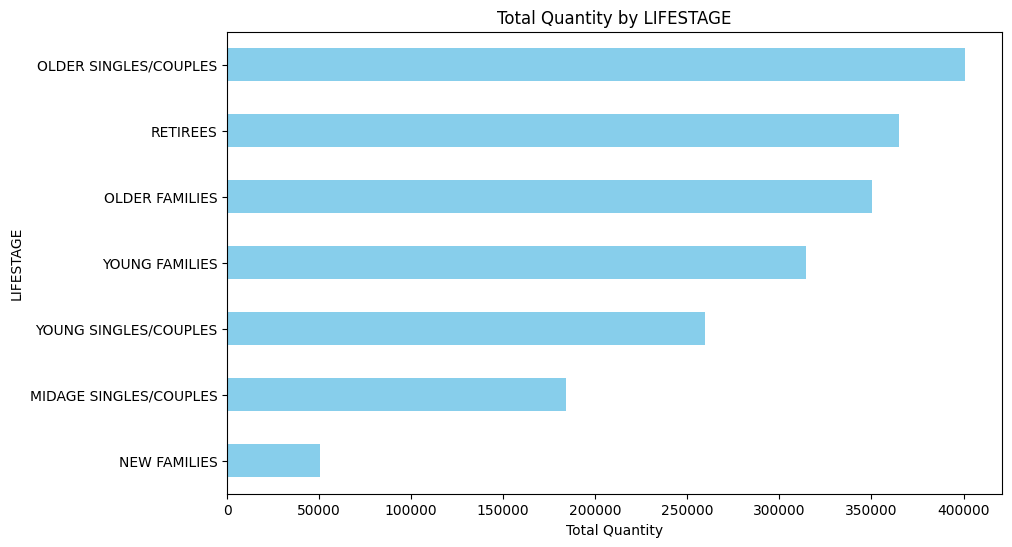

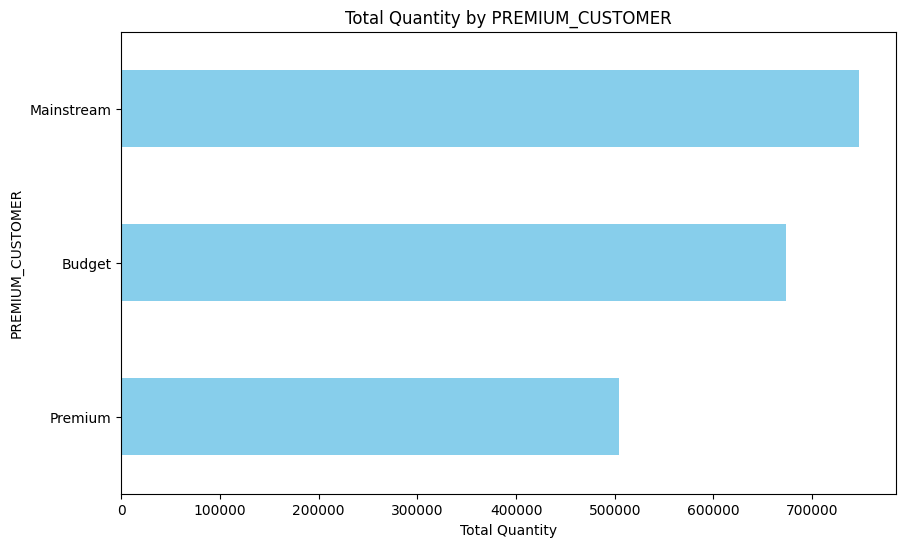

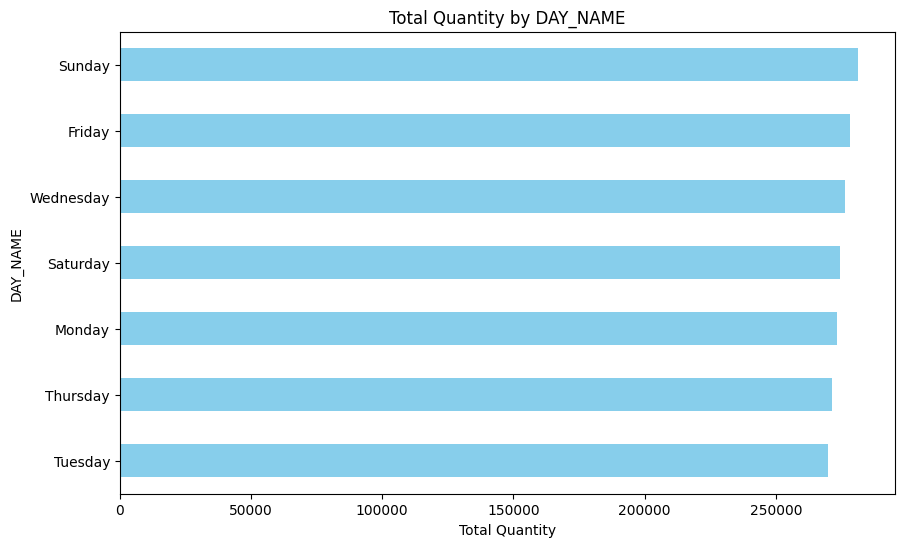

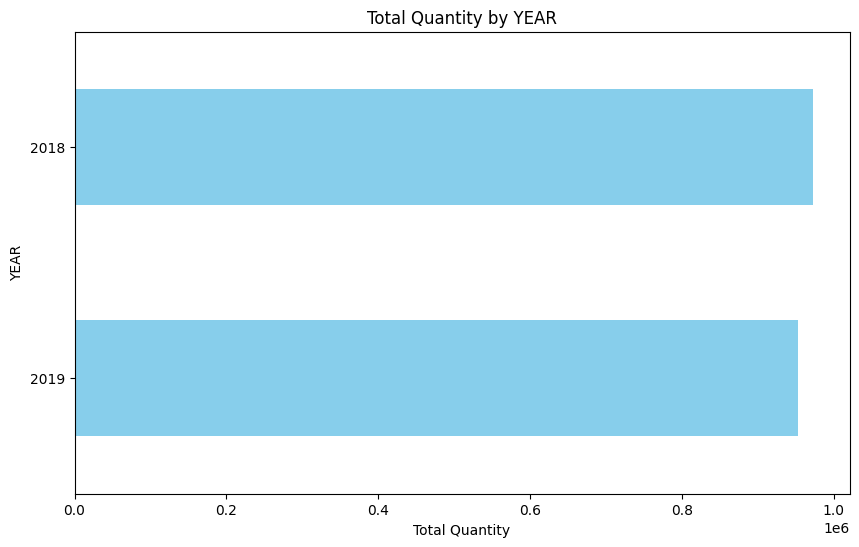

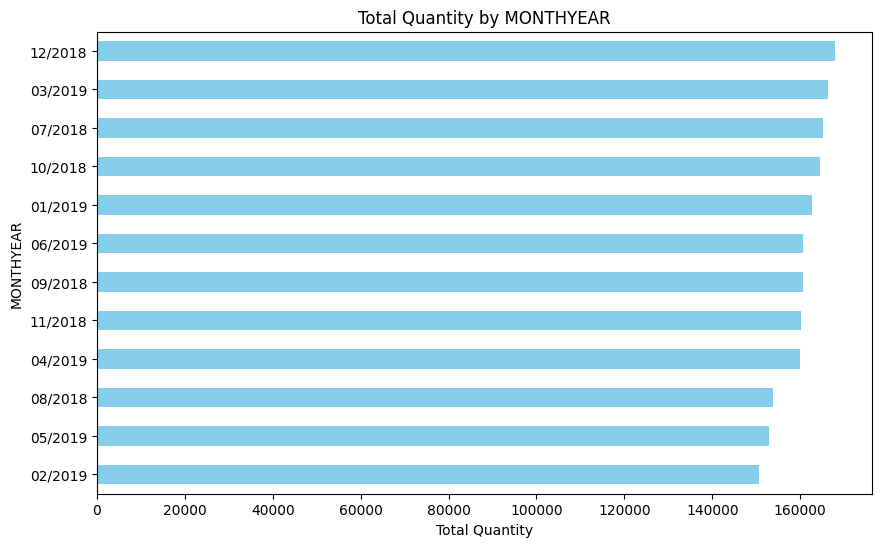

In [151]:
group_columns = ['BRAND_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DAY_NAME', 'YEAR', 'MONTHYEAR']
qty_column = 'TOT_SALES'

plot_qty_by_each_column(df, group_columns, qty_column)

In [152]:
# Distribution of average PROD_QTY

In [153]:
def plot_avg_qty_by_each_column(data, columns, qty_column):
    """
    This function takes a DataFrame, a list of columns, and a sales column,
    and plots the total sales for each column individually.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    columns (list): A list of columns to group by individually.
    sales_column (str): The column name representing sales.
     """
       
    for column in columns:
        # Group by the column and sum the sales column
        qty_by_group = data.groupby(column)[qty_column].mean()
        
        # Sort the sales by group
        sorted_qty_group = qty_by_group.sort_values()
        
        # Plot the total sales for each group
        plt.figure(figsize=(10, 6))
        sorted_qty_group.plot(kind='barh', color='skyblue')
        plt.xlabel('Avg Quantity')
        plt.title(f'Average Quantity by {column}')
        plt.show()

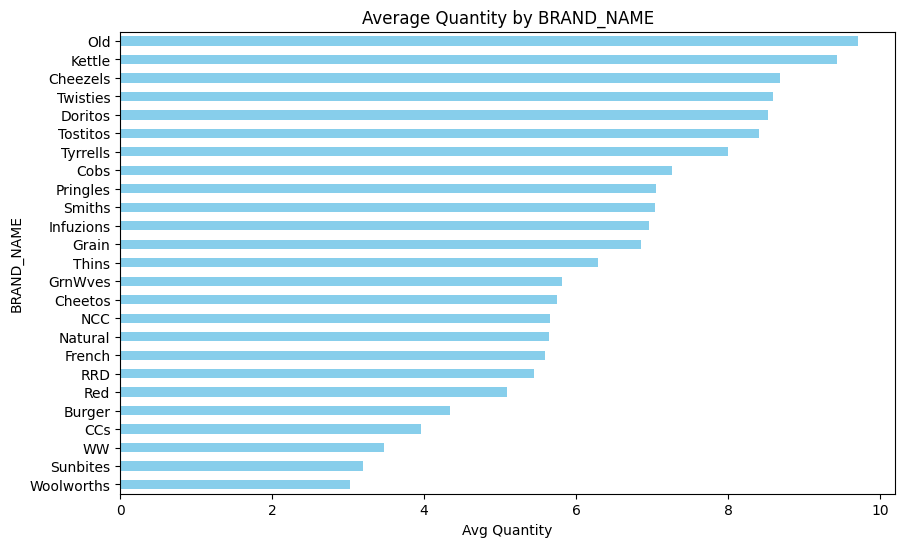

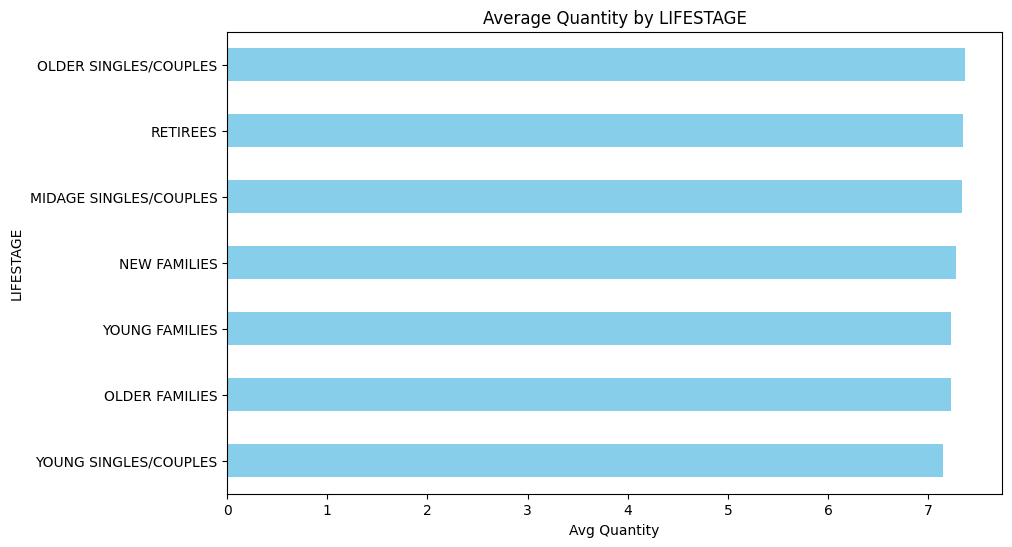

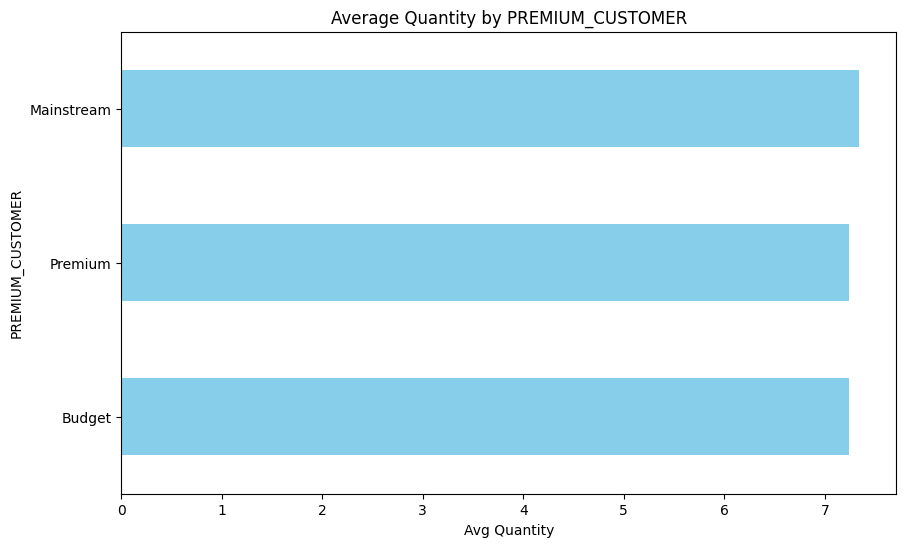

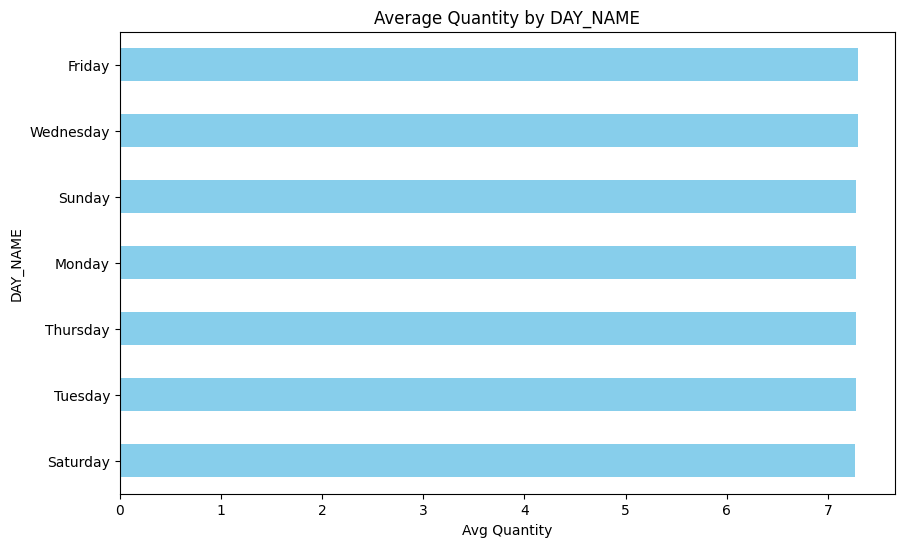

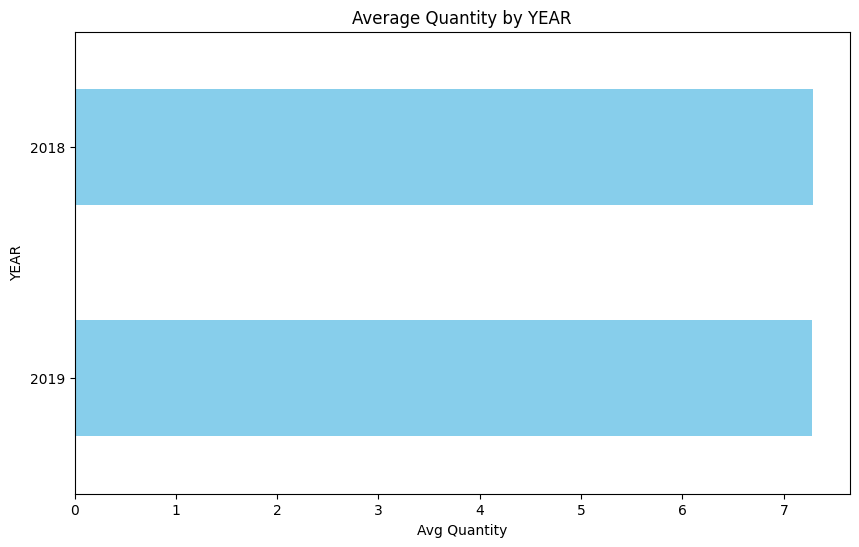

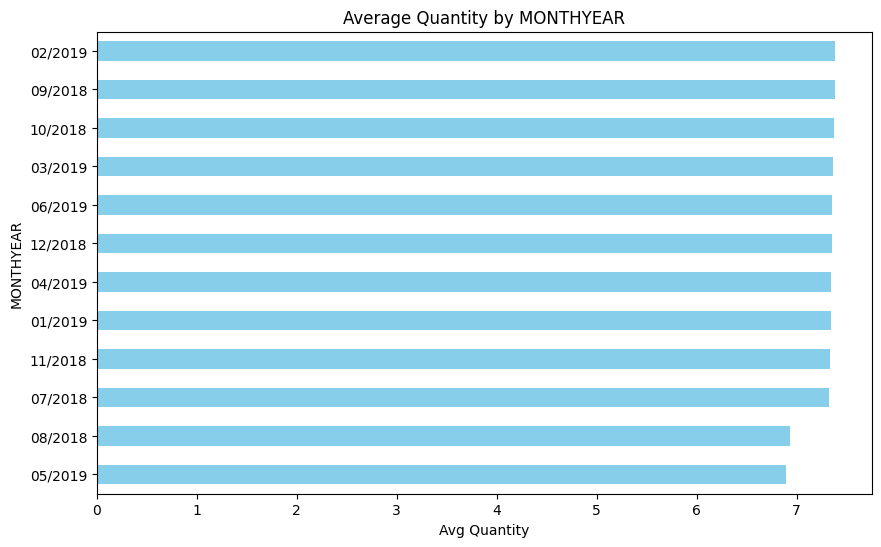

In [154]:
plot_avg_qty_by_each_column(df, group_columns, qty_column)

## Sales Analysis

In [117]:
# What are the total sales (TOT_SALES) over time? Can we identify any trends or seasonality?

In [118]:
def group_and_aggregate(df, column_names, stat_summary):
    """
    Groups the DataFrame by the specified column names and applies the given statistical summary.

    Parameters:
    df (pd.DataFrame): The DataFrame to be grouped and aggregated.
    column_names (list): List of column names to group by.
    stat_summary (dict): Dictionary specifying the aggregation functions.

    Returns:
    pd.DataFrame: The grouped and aggregated DataFrame.
    """
    grouped_df = df.groupby(column_names).agg(stat_summary)
    rounded_df = grouped_df.round(0)
    return rounded_df

In [155]:
# Group by 'YEAR' and calculate the sum, mean and median of 'TOT_SALES'

column_names = ["YEAR"]
stat_summary = {"TOT_SALES": ["sum", "mean", "median"]}

year_tot_sales = group_and_aggregate(df, column_names,stat_summary)
year_tot_sales

TOT_SALES            
           sum mean median
YEAR                      
2018  972156.0  7.0    7.0
2019  952770.0  7.0    7.0

In [156]:
# Which store (STORE_NBR) generates the highest sales? Are there any underperforming stores?

In [160]:
# Group by 'STORE_NBR' and calculate the sum of 'TOT_SALES'
store_stats = df.groupby('STORE_NBR')['TOT_SALES'].sum()

# Get the top 3 stores with the highest sales
top_3_stores = store_stats.nlargest(3)

# Print each store separately
for rank, (store_nbr, tot_sales) in enumerate(top_3_stores.items(), start=1):
    print(f"Store number {store_nbr} has the top rank {rank} with sales of ${tot_sales}")

print("\n")

# Get the bottom 3 stores with the lowest sales
bottom_3_stores = store_stats.nsmallest(3)

# Print each store separately
for rank, (store_nbr, tot_sales) in enumerate(bottom_3_stores.items(), start=1):
    print(f"Store number {store_nbr} has the bottom rank {rank} with sales of ${tot_sales:.2f}")

Store number 226 has the top rank 1 with sales of $17504.95
Store number 88 has the top rank 2 with sales of $16294.75
Store number 165 has the top rank 3 with sales of $15891.75


Store number 211 has the bottom rank 1 with sales of $5.20
Store number 76 has the bottom rank 2 with sales of $6.00
Store number 11 has the bottom rank 3 with sales of $6.70


In [161]:
# How do sales vary across different products (PROD_NAME)?

In [162]:
# Group by 'PROD_NAME' and calculate the sum of 'TOT_SALES'
prd_stats = df.groupby('PROD_NAME')['TOT_SALES'].sum()

# Get the top 3 products with the highest sales
top_3_prd = prd_stats.nlargest(3)

# Print each product separately
for rank, (prod_name, tot_sales) in enumerate(top_3_prd.items(), start=1):
    print(f"{prod_name} has the top rank {rank} with sales of ${tot_sales:.1f}")

print("\n")

# Get the bottom 3 stores with the lowest sales
bottom_3_prd = prd_stats.nsmallest(3)

# Print each store separately
for rank, (prod_name, tot_sales) in enumerate(bottom_3_prd.items(), start=1):
    print(f"{prod_name} has the bottom rank {rank} with sales of ${tot_sales:.1f}")

Dorito Corn Chp     Supreme has the top rank 1 with sales of $38938.2
Smiths Crnkle Chip  Orgnl Big Bag has the top rank 2 with sales of $36161.1
Smiths Crinkle Chips Salt & Vinegar has the top rank 3 with sales of $34718.7


Woolworths Medium   Salsa has the bottom rank 1 with sales of $4035.0
Woolworths Mild     Salsa has the bottom rank 2 with sales of $4182.0
WW Crinkle Cut      Original has the bottom rank 3 with sales of $4515.2


In [163]:
# What are the most popular brands BRAND_NAME in terms of quantity sold?

In [164]:
# Group by 'PROD_NAME' and calculate the sum of 'TOT_SALES'
brd_qty = df.groupby('BRAND_NAME')['PROD_QTY'].sum()

# Get the top 3 products with the highest sales
top_3_brd = brd_qty.nlargest(3)

# Print each product separately
for rank, (brand_name, tot_sales) in enumerate(top_3_brd.items(), start=1):
    print(f"Brand {brand_name} has top rank {rank} with quantity of ${tot_sales}")

print("\n")

# Get the bottom 3 stores with the lowest sales
bottom_3_brd = brd_qty.nsmallest(3)

# Print each store separately
for rank, (brand_name, tot_sales) in enumerate(bottom_3_brd.items(), start=1):
    print(f"Brand {brand_name} has the bottom rank {rank} with quantity of ${tot_sales}")

Brand Kettle has top rank 1 with quantity of $78716
Brand Smiths has top rank 2 with quantity of $60092
Brand Doritos has top rank 3 with quantity of $53596


Brand French has the bottom rank 1 with quantity of $2643
Brand NCC has the bottom rank 2 with quantity of $2667
Brand GrnWves has the bottom rank 3 with quantity of $2749


In [165]:
# What is the loyalty card number (LYLTY_CARD_NBR) distribution? Are there frequent shoppers?

In [172]:
# Define a threshold for frequent shoppers
threshold = 10
frequent_shoppers = df['LYLTY_CARD_NBR'].value_counts() > threshold

print(f"Frequent Shoppers (more than {threshold} transactions):\n{frequent_shoppers.sum()} customers")

Frequent Shoppers (more than 10 transactions):
1208 customers


In [174]:
# Retrieviing the details of frequent shoppers
frequent_shopper_card_numbers = frequent_shoppers[frequent_shoppers].index

# Filter the main DataFrame to get details of frequent shoppers
frequent_shoppers_details = df[df['LYLTY_CARD_NBR'].isin(frequent_shopper_card_numbers)]

In [175]:
frequent_shoppers_details.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR,LIFESTAGE,PREMIUM_CUSTOMER
61,2018-08-17,83,83008,82090,104,Infuzions Thai SweetChili PotatoMix,2,7.6,110,Infuzions,Medium,Friday,August,2018,08/2018,MIDAGE SINGLES/COUPLES,Budget
62,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea,2,8.4,135,Kettle,Medium,Monday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
64,2018-08-16,83,83186,83162,4,Dorito Corn Chp Supreme,2,6.5,380,Doritos,Extra Large,Thursday,August,2018,08/2018,MIDAGE SINGLES/COUPLES,Budget
68,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht,1,5.1,300,Old,Extra Large,Wednesday,August,2018,08/2018,MIDAGE SINGLES/COUPLES,Budget
80,2019-05-18,114,114185,118043,24,Grain Waves Sweet Chilli,1,3.6,210,Grain,Large,Saturday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget


__This can be further saved into a csv file for further analysis.__

In [176]:
# How many unique customers do we have based on loyalty card numbers?

In [178]:
df['LYLTY_CARD_NBR'].nunique()

72597

In [179]:
# What is the average transaction quantity (PROD_QTY) per customer?

In [180]:
avg_qty_cus = df.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum()
avg_qty_cus.sort_values(ascending=False).head()

LYLTY_CARD_NBR
230078    36
162039    36
172032    35
13138     34
116181    34
Name: PROD_QTY, dtype: int64

In [181]:
# How many customers buy each brand per year?

In [194]:
column_names=['BRAND_NAME','YEAR']
stat_summary= {'LYLTY_CARD_NBR':'count'}

result = group_and_aggregate(df, column_names, stat_summary)

# Make into a pivot table
pivot_df = result.pivot_table(index='BRAND_NAME', columns='YEAR', values='LYLTY_CARD_NBR')

# Sort the pivot table by the first year column in descending order
pivot_df = pivot_df.sort_values(by=pivot_df.columns[0], ascending=False, axis=0)

# Display the pivot table
pivot_df

YEAR,2018,2019
BRAND_NAME,,
Kettle,20871.0,20350.0
Smiths,15906.0,15867.0
Doritos,14260.0,13841.0
Pringles,12735.0,12316.0
Thins,7213.0,6835.0
Infuzions,7147.0,7035.0
RRD,5920.0,5954.0
WW,5199.0,5105.0
Cobs,4896.0,4782.0


In [192]:
# What is the total transaction quantity (PROD_QTY) per brand?

In [195]:
avg_qty_brd = df.groupby('BRAND_NAME')['PROD_QTY'].sum()
avg_qty_brd.sort_values(ascending=False)

BRAND_NAME
Kettle        78716
Smiths        60092
Doritos       53596
Pringles      47764
Infuzions     27024
Thins         26794
RRD           22400
WW            19381
Cobs          18496
Tostitos      18069
Twisties      18028
Old           17730
Tyrrells      12268
Grain         11922
Natural       11359
Red           11071
Cheezels       8717
CCs            8574
Woolworths     8335
Sunbites       5642
Cheetos        5500
Burger         2935
GrnWves        2749
NCC            2667
French         2643
Name: PROD_QTY, dtype: int64

In [196]:
# What is the range of transaction IDs (TXN_ID)? Are there any duplicated IDs?

In [198]:
duplicated_ids = df['TXN_ID'].duplicated()
num_duplicated_ids = duplicated_ids.sum()
print(f"Number of duplicated TXN_IDs: {num_duplicated_ids}")

Number of duplicated TXN_IDs: 1705


In [201]:
# Retrieving details of duplicated transactions
duplicated_ids_numbers = df.loc[duplicated_ids, 'TXN_ID']

# Filter the main DataFrame to get details of with duplicated IDs
duplicated_ids_details = df[df['TXN_ID'].isin(duplicated_ids_numbers)]
duplicated_ids_details.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PKT_WGT,BRAND_NAME,SIZE_CATEGORY,DAY_NAME,MONTH_NAME,YEAR,MONTHYEAR,LIFESTAGE,PREMIUM_CUSTOMER
39,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme,1,3.25,380,Doritos,Extra Large,Monday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
40,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.60,270,Twisties,Extra Large,Monday,May,2019,05/2019,MIDAGE SINGLES/COUPLES,Budget
366,2019-01-10,7,7364,7739,50,Tostitos Lightly Salted,2,8.80,175,Tostitos,Large,Thursday,January,2019,01/2019,MIDAGE SINGLES/COUPLES,Budget
367,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme,2,11.40,330,Doritos,Extra Large,Thursday,January,2019,01/2019,MIDAGE SINGLES/COUPLES,Budget
408,2018-10-18,12,12301,10982,50,Tostitos Lightly Salted,2,8.80,175,Tostitos,Large,Thursday,October,2018,10/2018,MIDAGE SINGLES/COUPLES,Budget


__These are the buyers who bought more than one brand.__

In [953]:
# What segment of the buyers bought what brand?

In [204]:
column_names=['LIFESTAGE','BRAND_NAME']
stat_summary= {'PROD_QTY':'sum'}

result = group_and_aggregate(df, column_names, stat_summary)

# Make into a pivot table
pivot_df = result.pivot_table(index='BRAND_NAME', columns='LIFESTAGE', values='PROD_QTY')

# Display the pivot table
pivot_df

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
BRAND_NAME,,,,,,,
Burger,287.0,70.0,676.0,553.0,467.0,574.0,308.0
CCs,808.0,168.0,1819.0,1607.0,1387.0,1731.0,1054.0
Cheetos,489.0,106.0,1199.0,1097.0,910.0,1069.0,630.0
Cheezels,846.0,237.0,1578.0,1806.0,1626.0,1489.0,1135.0
Cobs,1821.0,537.0,3155.0,3893.0,3587.0,2917.0,2586.0
Doritos,5058.0,1474.0,9391.0,11333.0,10359.0,8543.0,7438.0
French,218.0,56.0,544.0,522.0,423.0,541.0,339.0
Grain,1172.0,349.0,2091.0,2493.0,2317.0,1826.0,1674.0
GrnWves,221.0,54.0,650.0,556.0,454.0,529.0,285.0


In [205]:
# Are there any patterns or differences in spending behavior between different life stages and premium customer segments?

In [206]:
# Group by both 'BRAND_NAME' and 'LIFESTAGE' and calculate the total sales
result = df.groupby(['BRAND_NAME', 'LIFESTAGE'])['TOT_SALES'].sum()

result_df= result.reset_index()

# Display the result (you can customize this based on your needs)
pivot_df = result_df.pivot_table(index='BRAND_NAME', columns='LIFESTAGE', values='TOT_SALES')

In [207]:
sorted_pivot_df = pivot_df.sort_values(by='NEW FAMILIES', ascending=False)
sorted_pivot_df

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
BRAND_NAME,,,,,,,
Kettle,38118.20,10773.2,65611.00,83453.60,76729.80,59860.00,54047.0
Doritos,22648.35,6677.3,41535.65,50784.45,46647.15,37788.45,33659.3
Smiths,20962.70,5293.4,44866.00,45017.50,40004.90,39469.70,28150.0
Pringles,16783.20,4898.8,30362.20,37529.10,34713.40,27269.00,25167.4
Infuzions,9814.40,2696.0,17510.80,20625.60,18830.00,15456.80,13774.0
Old,8863.80,2371.5,15677.40,18941.40,17727.60,14427.90,12408.3
Thins,8253.30,2326.5,15859.80,18753.90,17457.00,13787.40,11979.0
Tostitos,7757.20,2288.0,13204.40,17160.00,15527.60,12438.80,11127.6
Cobs,6919.80,2040.6,11989.00,14793.40,13630.60,11084.60,9826.8


In [208]:
# Group by both 'BRAND_NAME' and 'PREMIUM_CUSTOMER' and calculate the total sales
result = df.groupby(['BRAND_NAME', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

result_df= result.reset_index()

# Display the result (you can customize this based on your needs)
pivot_df = result_df.pivot_table(index='BRAND_NAME', columns='PREMIUM_CUSTOMER', values='TOT_SALES')

# Sort by column of choice
col = ['Premium','Budget','Premium']
sorted_pivot_df = pivot_df.sort_values(by=col, ascending=False)
sorted_pivot_df

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
BRAND_NAME,,,
Kettle,133880.8,153756.00,100956.0
Doritos,83687.0,95355.15,60698.5
Smiths,80418.0,84479.70,58866.5
Pringles,60868.7,69452.70,46401.7
Infuzions,34165.0,38672.00,25870.6
Thins,30911.1,34161.60,23344.2
Old,31094.7,36062.10,23261.1
Twisties,27822.0,32259.50,21034.1
Tostitos,27209.6,31275.20,21018.8


In [960]:
# Does the packet weight have any relationship with the quantity bought and the customer

In [213]:
# Create a contingency table
contingency_table = pd.crosstab(tran_df['SIZE_CATEGORY'], tran_df['LYLTY_CARD_NBR'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Size Category and Customer.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Size Category and Customer.")

Chi-Square Statistic: 149562.28493937256
P-Value: 4.8218499008927575e-16
Reject the null hypothesis: There is a significant relationship between Size Category and Customer.


In [214]:
# Does the stores have any relationship with the quantity bought, the customer, the total sales and the product bought?

<Axes: >

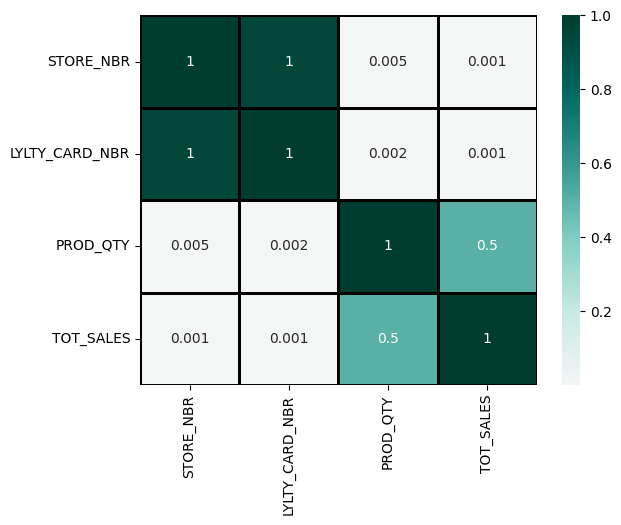

In [216]:
# Pick variables
df_correlation = df[["STORE_NBR", "LYLTY_CARD_NBR", "PROD_QTY", "TOT_SALES"]]

#Correlation matrix
df_correlation.corr()

#Correlation heatmap
sns.heatmap(data = df_correlation.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'BrBG',
            linewidths = 1,
            linecolor = 'black')

__There is a strong positive correlation between store number and loyalty card number, the correlations with product quantity and total sales are negligible.__

In [1]:
# Save merged df as a csv

df.to_csv("Merged_QVI.csv")

NameError: name 'df' is not defined

<div style="text-align: center;">
    <img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExdDBicXE4d3F4N3FrOTI2Nnk2ZXg5OWNwbXRyenZlenBvY3hxc3hjcCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l2JdWjTqz3AMqfrNe/giphy.webp" alt="Chips" style="width: 500px;" />
</div>